<a href="https://colab.research.google.com/github/kgupta1502/Route-Optimization-/blob/main/Route_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>osmnx fetches street data,
>geopandas handles geospatial data,
>networkx models road networks as graphs,
>ortools optimizes routes,
>plotly visualizes results.

In [ ]:
!pip install osmnx
!pip install geopandas
!pip install networkx
!pip install ortools
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [ ]:
!pip install folium

pandas: data manipulation and analysis
numpy: numerical computing with arrays and matrices
matplotlib.pyplot: creating static, interactive, and animated visualizations
seaborn: statistical data visualization based on matplotlib
plotly.express: creating interactive visualizations
osmnx: retrieving, modeling, analyzing, and visualizing street networks from OpenStreetMap
geopandas: working with geospatial data in pandas
networkx: creating, manipulating, and studying the structure, dynamics, and functions of complex networks
routing_enums_pb2: defines protobuf messages for routing enums in ortools
pywrapcp: provides a C++ wrapper for the constraint programming solver in ortools


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import osmnx as ox
import geopandas as gpd
import networkx as nx
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

WE CAN MAKE CHANGES IN THE NUMBER OF HEAD HERE SO THAT WE HAVE MORE NODES

city = "Abu Dhabi": Assigns the string "Abu Dhabi" to the variable city. This variable is used to filter the data in the next step.
dtf = pd.read_csv('/content/drive/MyDrive/data_stores.csv'): Reads a CSV file named data_stores.csv located in your Google Drive into a pandas DataFrame called dtf. This DataFrame likely contains information about various stores or locations.
dtf = dtf[dtf["City"] == city][["City", "Street Address", "Latitude", "Longitude"]].reset_index(drop=True): Filters the dtf DataFrame to include only rows where the "City" column matches the value in the city variable ("Abu Dhabi"). Then, it selects specific columns ("City", "Street Address", "Latitude", "Longitude") and resets the index, removing the original index.
dtf = dtf.reset_index().rename(columns={"index": "id", "Latitude": "y", "Longitude": "x"}): Resets the index again, creating a new column named "index," which is then renamed to "id." This assigns a unique identifier to each row. Additionally, the "Latitude" and "Longitude" columns are renamed to "y" and "x," respectively, for convenience.
print("total", len(dtf)): Prints the total number of rows (locations) in the filtered dtf DataFrame. This tells you how many stores or locations are in Abu Dhabi.
dtf.head(10): Displays the first 10 rows of the dtf DataFrame, providing a preview of the data.

In [ ]:
city = "Abu Dhabi"
dtf=pd.read_csv('/content/drive/MyDrive/data_stores.csv')
dtf=dtf[dtf["City"]==city][ ["City", "Street Address", "Latitude", "Longitude"]].reset_index(drop=True)
dtf=dtf.reset_index().rename(columns={"index":"id", "Latitude":"y", "Longitude":"x"})

print("total", len(dtf))
dtf.head(10)

total 43


,id,City,Street Address,y,x
0,0,Abu Dhabi,Al Salam Street,24.48,54.38
1,1,Abu Dhabi,"Khaldiya Area, Abu Dhabi Island",24.51,54.54
2,2,Abu Dhabi,"Dalma Mall, Mussafah",24.40,54.49
3,3,Abu Dhabi,"Dalma Mall, Mussafah",24.40,54.49
4,4,Abu Dhabi,Yas Island,24.46,54.61
5,5,Abu Dhabi,Khalidiya St.,24.19,55.69
6,6,Abu Dhabi,"Al Salam Street, The Mangroves",24.48,54.38
7,7,Abu Dhabi,Corniche Street,24.47,54.34
8,8,Abu Dhabi,"Najda Street, Higher Colleges of Technology",24.49,54.37
9,9,Abu Dhabi,"Khalidiya St., Beside Union Cooperative Society",24.19,55.69


data = dtf.copy(): Creates a copy of the dtf DataFrame and assigns it to the variable data. This ensures that any modifications made to data won't affect the original dtf DataFrame.
data["color"] = '': Adds a new column named "color" to the data DataFrame and initializes all values to an empty string.
data.loc[data['id'] == 0, 'color'] = 'red': Sets the "color" column to 'red' for the row where the "id" column is equal to 0. This likely highlights the starting point or depot for the route optimization.
data.loc[data['id'] != 0, 'color'] = 'black': Sets the "color" column to 'black' for all rows where the "id" column is not equal to 0. This likely represents the locations to be visited.
start = data[data["id"] == 0][["y", "x"]].values[0]: Extracts the latitude ("y") and longitude ("x") values for the starting point (where "id" is 0) and assigns them to the variable start.
data.head(3): Displays the first 3 rows of the data DataFrame, allowing you to see the added "color" column and the initial data.
print("starting point:", start): Prints the coordinates of the starting point, which were extracted and stored in the start variable.

In [ ]:
data = dtf.copy()
data["color"]=''
data.loc[data['id']==0 , 'color'] = 'red'
data.loc[data['id']!=0 , 'color'] = 'black'
start=data[data["id"]==0][["y","x"]].values[0]
data.head(3)
print("starting point:" , start)

starting point: [24.48 54.38]


In [ ]:
# creating interactive maps
import folium

map = folium.Map(location=start, tiles="cartodbpositron", zoom_start=12):
Creates a folium map object centered at the start location (which you previously defined as the starting point coordinates).
Uses the "cartodbpositron" tile layer, giving the map a visually appealing style.
Sets the initial zoom level to 12.
data.apply(lambda row: folium.CircleMarker(location=[row["y"], row["x"]], color=row["color"], fill=True, radius=5).add_to(map), axis=1):
Iterates through each row of the data DataFrame.
For each row, it creates a folium.CircleMarker with:
location: Set to the latitude (row["y"]) and longitude (row["x"]) from the row.
color: Set to the color value from the "color" column (row["color"]), which you previously set to 'red' for the starting point and 'black' for other locations.
fill: Set to True to fill the circle marker with the specified color.
radius: Set to 5 to control the size of the marker.
Adds the created CircleMarker to the map object.
map:
Displays the map within your Colab notebook.

In [ ]:
map = folium.Map(location=start, tiles= "cartodbpositron", zoom_start=12)
data.apply(lambda row:
    folium.CircleMarker(
        location=[row["y"], row["x"]],
        color=row["color"], fill = True, radius=5).add_to(map), axis=1)

map

 downloads road network data, adds speeds and travel times to it, and then visualizes the network as a graph with black background, white nodes, and a specified size.

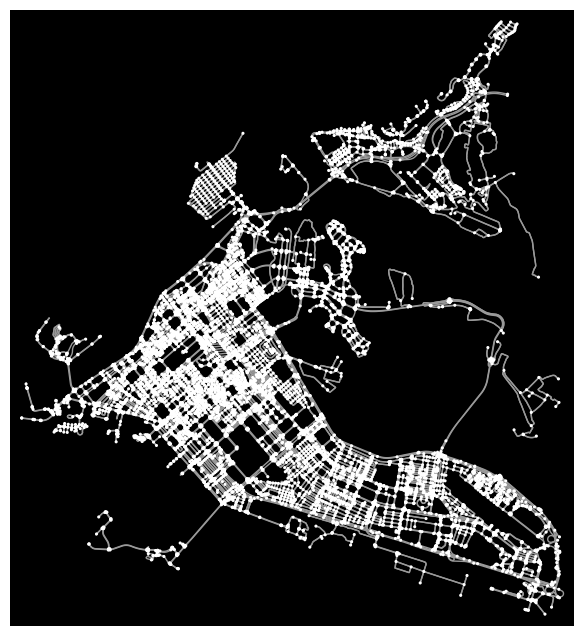

In [ ]:
G=ox.graph_from_point(start, dist=10000, network_type="drive")
G=ox.add_edge_speeds(G)
G=ox.add_edge_travel_times(G)
fig,ax = ox.plot_graph(G, bgcolor="black", node_size=5 , node_color="white", figsize=(16,8))

HERE ALSO WE CAN CHANGE THE NUMBER OF HEADS SO THAT WE HAVE MORE DATAPOINTS AS NODES


 This code does the following:

Identifies the starting node in the road network graph.
Maps each location in your data to the nearest node in the road network.
Removes duplicate locations that map to the same node.

In [ ]:
start_node=ox.distance.nearest_nodes(G, start[1], start[0])
dtf["node"]=dtf[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
dtf=dtf.drop_duplicates("node", keep='first')
dtf.head()

<ipython-input-9-3f563add5754>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dtf["node"]=dtf[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
<ipython-input-9-3f563add5754>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dtf["node"]=dtf[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
<ipython-input-9-3f563add5754>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dtf["nod

,id,City,Street Address,y,x,node
0,0,Abu Dhabi,Al Salam Street,24.48,54.38,4726913964
1,1,Abu Dhabi,"Khaldiya Area, Abu Dhabi Island",24.51,54.54,2510747272
2,2,Abu Dhabi,"Dalma Mall, Mussafah",24.40,54.49,263398544
4,4,Abu Dhabi,Yas Island,24.46,54.61,9026141970
7,7,Abu Dhabi,Corniche Street,24.47,54.34,4003569640


NUMBER OF HEADS CAN BE CHANGED HERE TOO

This code calculates the shortest travel time distances between all pairs of nodes (representing your store locations) in the road network graph. It then stores these distances in a pandas DataFrame (distance_matrix) with node IDs as column and index labels. This distance matrix is a crucial input for route optimization algorithms, as it provides the travel times between locations.

In [ ]:
def f(a , b):
    try:
        d=nx.shortest_path_length(G, source=a, target=b, method='dijkstra', weight='travel_time')
    except:
        d=np.nan
    return d

distance_matrix=np.asarray([[f(a,b)for b in dtf["node"].tolist()] for a in dtf["node"].tolist()])
distance_matrix=pd.DataFrame(distance_matrix, columns=dtf["node"].values, index=dtf["node"].values)

distance_matrix.head()

,4726913964,2510747272,263398544,9026141970,4003569640,1875975206,10723288960,4758786763,1788613932,261710159,...,4728269532,1806123308,6025135819,1835067185,838326915,4723236679,261675230,262187603,10683253435,262634978
4726913964,0.000000,1162.967752,698.461327,826.910002,293.528887,133.146074,820.902715,241.887969,86.013032,NaN,...,441.696934,638.866793,904.422958,189.489588,448.151361,145.412817,358.947784,352.254894,125.212047,584.736609
2510747272,1201.933686,0.000000,1821.336365,1889.950283,1296.171762,1122.443548,1883.942996,1281.731665,1263.550131,NaN,...,1420.890872,668.334102,1079.807779,1152.273737,1571.026399,1320.180474,1481.822823,1089.780677,1225.918996,1707.611647
263398544,755.955984,1783.604661,0.000000,891.959164,692.139536,773.245638,885.951877,675.584820,631.219188,NaN,...,832.485078,1259.503701,1525.059866,829.874986,329.244069,576.971310,402.380920,972.891803,722.028541,216.756615
9026141970,873.999822,1798.083333,903.580496,0.000000,1064.895379,866.609824,186.478919,1022.087423,866.212486,NaN,...,1217.134582,1273.982373,1539.538538,922.415978,653.270529,804.333922,791.789671,1015.916706,898.706302,789.855777
4003569640,296.690049,1256.505024,681.298454,1071.961557,0.000000,225.269859,1065.954270,114.998825,225.164821,NaN,...,181.349689,732.404065,997.960230,250.479583,585.359095,328.947767,439.531942,424.936048,257.338365,679.801898


As i was getting an error of representing some distance as NaN, so what i did is to convert these values to a very large value such as 999999.
This code prepares the distance_matrix for use in route optimization algorithms by:

Rounding distance values to integers.
Replacing missing and infinite values with a large integer.
Ensuring all values are of integer data type.
These steps help to clean and format the distance data to make it suitable for input into route optimization algorithms.

In [ ]:
distance_matrix= distance_matrix.round()
# Replace NaN and inf with a large integer, like 999999
distance_matrix = distance_matrix.fillna(999999)  # Replace NaN with 999999
distance_matrix = distance_matrix.replace([np.inf, -np.inf], 999999)  # Replace inf with 999999
distance_matrix=distance_matrix.astype('int')
distance_matrix

,4726913964,2510747272,263398544,9026141970,4003569640,1875975206,10723288960,4758786763,1788613932,261710159,...,4728269532,1806123308,6025135819,1835067185,838326915,4723236679,261675230,262187603,10683253435,262634978
4726913964,0,1163,698,827,294,133,821,242,86,999999,...,442,639,904,189,448,145,359,352,125,585
2510747272,1202,0,1821,1890,1296,1122,1884,1282,1264,999999,...,1421,668,1080,1152,1571,1320,1482,1090,1226,1708
263398544,756,1784,0,892,692,773,886,676,631,999999,...,832,1260,1525,830,329,577,402,973,722,217
9026141970,874,1798,904,0,1065,867,186,1022,866,999999,...,1217,1274,1540,922,653,804,792,1016,899,790
4003569640,297,1257,681,1072,0,225,1066,115,225,999999,...,181,732,998,250,585,329,440,425,257,680
1875975206,93,1102,780,888,246,0,882,209,165,999999,...,398,578,844,104,530,228,441,292,113,667
10723288960,868,1792,898,186,1059,861,0,1016,860,999999,...,1211,1268,1534,916,647,798,786,1010,893,784
4758786763,215,1234,665,1012,129,175,1006,0,144,999999,...,282,710,976,232,548,258,421,411,176,664
1788613932,197,1260,643,927,210,201,921,159,0,999999,...,356,736,1002,258,460,172,350,450,160,595
261710159,563,1572,520,667,731,578,661,697,541,0,...,871,1048,1314,633,322,451,460,762,585,422


Number of drivers: Specifies that there is only one driver in this scenario.
List of nodes: Creates a list of node IDs representing the locations to be visited.
Print information: Displays key details about the optimization problem.
This code essentially initializes the route optimization process and provides context for the subsequent steps.

In [ ]:
drivers = 1
lst_nodes= dtf["node"].tolist()
print("start:", start_node, "total locations to visit", len(lst_nodes)-1, "drivers", drivers)

start: 4726913964 total locations to visit 22 drivers 1


Routing Index Manager: Manages the mapping between node indices and node IDs.
Routing Model: Represents the optimization problem and provides methods for solving it.
These components are essential for setting up and solving the vehicle routing problem using OR-Tools.

In [ ]:
manager= pywrapcp.RoutingIndexManager(len(lst_nodes), drivers, lst_nodes.index(start_node))
model=pywrapcp.RoutingModel(manager)


Defining a distance callback: Provides a way for the solver to retrieve distances between nodes.
Setting the arc cost evaluator: Instructs the solver to use the distance callback to determine travel costs.
Configuring search parameters: Sets the initial solution strategy to guide the solver's search process.

In [ ]:
def get_distance(from_index, to_index):
    return distance_matrix.iloc[from_index, to_index]

distance=model.RegisterTransitCallback(get_distance)
model.SetArcCostEvaluatorOfAllVehicles(distance)

parameters = pywrapcp.DefaultRoutingSearchParameters()
parameters.first_solution_strategy= (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

 This code snippet solves the routing problem, extracts the route for the driver from the solution, calculates the total distance traveled, and prints the route, distance, and number of nodes visited.

In [ ]:
solution= model.SolveWithParameters(parameters)

index=model.Start(0)
print('route for driver:')
route_idx, route_distance = [], 0

while not model.IsEnd(index):
    route_idx.append(manager.IndexToNode(index))
    previous_index=index
    index=solution.Value(model.NextVar(index))

    try:
        route_distance +=get_distance(previous_index, index)
    except:
        route_distance+=model.GetArcCostForVehicle(from_index=previous_index, to_index=index, vehicle=0)

print(route_idx)
print(f'Total distance:{round(route_distance/1000,2)}km')
print(f'Nodes visited: {len(route_idx)}')

route for driver:
[0, 7, 8, 10, 4, 13, 5, 16, 21, 18, 19, 17, 22, 2, 11, 20, 12, 6, 3, 14, 15, 1, 9]
Total distance:2007.06km
Nodes visited: 23


Prints a header to indicate the output.
Converts the route from node indices to node IDs.
Prints the route in terms of node IDs.
This code essentially provides a more human-readable representation of the driver's route by using the actual node IDs instead of the internal node indices used by the routing solver

In [ ]:
print("Route for driver (nodes):")
lst_route=[lst_nodes[i] for i in route_idx]
print(lst_route)

Route for driver (nodes):
[4726913964, 4758786763, 1788613932, 261708389, 4003569640, 4728269532, 1875975206, 1835067185, 10683253435, 4723236679, 261675230, 838326915, 262634978, 263398544, 1810175320, 262187603, 2503219539, 10723288960, 9026141970, 1806123308, 6025135819, 2510747272, 261710159]


Defines a function to get shortest paths between nodes in a route.
Gets the shortest paths for the driver's route.
Adds the paths as blue lines to the folium map.
Displays the map with the route visualized.
Essentially, it enhances the folium map by drawing the optimized route on top of the existing markers, providing a clear visualization of the driver's path

In [ ]:
import folium

def get_path_between_nodes(lst_route):
    lst_paths=[]
    for i in range (len(lst_route)):
        try :
            a , b = lst_nodes[i], lst_nodes[i+1]
        except:
            break
        try:
            path=nx.shortest_path(G, source=a, target=b, method ='dijkstra', weight='travel_time')
            if len(path) > 1:
                lst_paths.append(path)
        except:
            continue
    return lst_paths

lst_paths= get_path_between_nodes(lst_route)

# Assuming 'map' is your folium.Map object
for path in lst_paths:
    # Extract node coordinates for the path
    route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in path]

    # Create a folium PolyLine and add it to the map
    folium.PolyLine(locations=route_coords, color="blue", weight=1).add_to(map)

map

This function takes a road network graph and a list of paths as input and creates a pandas DataFrame containing information about the edges in the paths, including their start and end nodes, coordinates, length, and travel time. This DataFrame can then be used to create an animation of the routes, as it provides the necessary data for visualizing the movement along the paths.

In [ ]:
def df_animation_multiple_path(G, lst_paths, parallel=True):
    df=pd.DataFrame()
    for path in lst_paths :
        lst_start, lst_end = [] , []
        start_x, start_y = [] , []
        end_x, end_y = [], []
        lst_length, lst_time = [], []

        for a , b in zip (path[:-1], path[1:]):
            lst_start.append(a)
            lst_end.append(b)
            lst_length.append(round(G.edges[(a,b,0)]['length']))
            lst_time.append(round(G.edges[(a,b,0)]['travel_time']))
            start_x.append(G.nodes[a]['x'])
            start_y.append(G.nodes[a]['y'])
            end_x.append(G.nodes[b]['x'])
            end_y.append(G.nodes[b]['y'])

        tmp=pd.DataFrame(list(zip(lst_start, lst_end, start_x, start_y, end_x, end_y, lst_length, lst_time)),
                         columns= ["start", "end", "start_x", "start_y", "end_x", "end_y", "length", "travel_time"])
        df=pd.concat([df,tmp], ignore_index=(not parallel))

    df=df.reset_index().rename(columns={"index":"id"})
    return df

Creating an empty DataFrame to store the animation data.
Calling the df_animation_multiple_path function to generate a DataFrame with information about the edges in the paths.
Adding the generated data to the main DataFrame.
Identifying the starting and ending nodes of the entire route.
This sets up the data structure needed to create the animation of the driver's route on the map.

In [ ]:
df= pd.DataFrame()
tmp=df_animation_multiple_path(G, lst_paths, parallel=False)
df=pd.concat([df, tmp], axis=0)
first_node, last_node= lst_paths[0][0], lst_paths[-1][-1]

This is the DataFrame

In [ ]:
(df)

,id,start,end,start_x,start_y,end_x,end_y,length,travel_time
0,0,4726913964,1807153984,54.379877,24.479472,54.381193,24.478273,188,11
1,1,1807153984,4086827006,54.381193,24.478273,54.381494,24.478022,41,2
2,2,4086827006,262189091,54.381494,24.478022,54.381551,24.477966,8,1
3,3,262189091,262189092,54.381551,24.477966,54.381682,24.477838,19,1
4,4,262189092,3926882175,54.381682,24.477838,54.381786,24.477895,12,1
...,...,...,...,...,...,...,...,...,...
1861,1861,262632309,3851316493,54.464583,24.414310,54.467755,24.413481,335,15
1862,1862,3851316493,3851316492,54.467755,24.413481,54.467904,24.413263,29,3
1863,1863,3851316492,9924435059,54.467904,24.413263,54.467834,24.413051,25,2
1864,1864,9924435059,262634979,54.467834,24.413051,54.467219,24.411188,216,19


In [ ]:
df_start= df[df["start"]== first_node]
df_end=df[df["end"]== last_node]

fig=px.scatter_mapbox(data_frame=df, lon="start_x", lat="start_y", zoom=15, width=900, height=700, animation_frame="id",mapbox_style="carto-positron")

fig.data[0].marker={"size":12}

fig.add_trace(px.scatter_mapbox(data_frame=dtf, lon="x", lat="y").data[0])
fig.data[1].marker={"size":10, "color":"black"}

fig.add_trace(px.scatter_mapbox(data_frame=df_start, lon="start_x", lat="start_y").data[0])
fig.data[2].marker={"size":15, "color":"red"}

fig.add_trace(px.scatter_mapbox(data_frame=df_end, lon="start_x", lat="start_y").data[0])
fig.data[3].marker={"size":15, "color":"green"}

fig.add_trace(px.line_mapbox(data_frame=df, lon="start_x", lat="start_y").data[0])

fig

WHAT IF WE WANT VARIABLES DRIVERS


In [ ]:
drivers = 3  # Define the desired number of drivers
lst_nodes = dtf["node"].tolist()
print("start:", start_node, "total locations to visit", len(lst_nodes) - 1, "drivers", drivers)

# Create Routing Index Manager
manager = pywrapcp.RoutingIndexManager(len(lst_nodes), drivers, lst_nodes.index(start_node))
model = pywrapcp.RoutingModel(manager)

# Define distance callback
def get_distance(from_index, to_index):
    return distance_matrix.iloc[from_index, to_index]

distance = model.RegisterTransitCallback(get_distance)
model.SetArcCostEvaluatorOfAllVehicles(distance)

# Set search parameters
parameters = pywrapcp.DefaultRoutingSearchParameters()
parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Solve the problem
solution = model.SolveWithParameters(parameters)

# Print the solution for each driver
for i in range(drivers):
    print(f"Route for driver {i + 1}:")
    index = model.Start(i)
    route_idx, route_distance = [], 0
    while not model.IsEnd(index):
        route_idx.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(model.NextVar(index))
        try:
            route_distance += get_distance(previous_index, index)
        except:
            route_distance += model.GetArcCostForVehicle(from_index=previous_index, to_index=index, vehicle=i)
    print(route_idx)  # Node indices for the driver's route
    print(f"Total distance: {round(route_distance / 1000, 2)} km")
    print(f"Nodes visited: {len(route_idx)}")
    print("-" * 20)

# ... (rest of your code for visualization, etc.)

start: 4726913964 total locations to visit 22 drivers 3
Route for driver 1:
[0]
Total distance: 0.0 km
Nodes visited: 1
--------------------
Route for driver 2:
[0]
Total distance: 0.0 km
Nodes visited: 1
--------------------
Route for driver 3:
[0, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Total distance: 2012.83 km
Nodes visited: 23
--------------------


In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

drivers = 3  # Define the desired number of drivers
lst_nodes = dtf["node"].tolist()
print("start:", start_node, "total locations to visit", len(lst_nodes) - 1, "drivers", drivers)

# Create Routing Index Manager
manager = pywrapcp.RoutingIndexManager(len(lst_nodes), drivers, lst_nodes.index(start_node))
model = pywrapcp.RoutingModel(manager)

# Define distance callback
def get_distance(from_index, to_index):
    return distance_matrix.iloc[from_index, to_index]

distance_callback_index = model.RegisterTransitCallback(get_distance)
model.SetArcCostEvaluatorOfAllVehicles(distance_callback_index)

# Add Dimension for Travel Time
dimension_name = 'TravelTime'
model.AddDimension(
    distance_callback_index,
    0,  # no slack
    3000,  # vehicle maximum travel time in seconds (adjust as needed)
    True,  # start cumul to zero
    dimension_name)
travel_time_dimension = model.GetDimensionOrDie(dimension_name)

# Set Global Span Cost Coefficient
# This prioritizes minimizing the longest route, leading to more balanced routes
travel_time_dimension.SetGlobalSpanCostCoefficient(100)

# Set search parameters
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Solve the problem
solution = model.SolveWithParameters(search_parameters)

# Print the solution for each driver
if solution:
    for i in range(drivers):
        print(f"Route for driver {i + 1}:")
        index = model.Start(i)
        route_idx, route_distance = [], 0
        while not model.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_idx.append(node_index)
            previous_index = index
            index = solution.Value(model.NextVar(index))
            route_distance += model.GetArcCostForVehicle(
                previous_index, index, i)  # Get cost between nodes
        print(route_idx)  # Node indices for the driver's route
        print(f"Total distance: {round(route_distance / 1000, 2)} km")  # Assuming distance is in meters
        print(f"Nodes visited: {len(route_idx)}")
        print("-" * 20)
else:
    print("No solution found.")

# ... (rest of your code for visualization, etc.)

start: 4726913964 total locations to visit 22 drivers 3
Route for driver 1:
[0]
Total distance: 0.0 km
Nodes visited: 1
--------------------
Route for driver 2:
[0]
Total distance: 0.0 km
Nodes visited: 1
--------------------
Route for driver 3:
[0, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Total distance: 0.0 km
Nodes visited: 23
--------------------


In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

drivers = 3  # Define the desired number of drivers
lst_nodes = dtf["node"].tolist()
num_locations = len(lst_nodes)
print("start:", start_node, "total locations to visit", num_locations - 1, "drivers", drivers)

# Create Routing Index Manager
manager = pywrapcp.RoutingIndexManager(num_locations, drivers, lst_nodes.index(start_node))
model = pywrapcp.RoutingModel(manager)

# Define distance callback
def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix.iloc[from_node, to_node]  # Access distance matrix using node indices

transit_callback_index = model.RegisterTransitCallback(distance_callback)
model.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Add Dimension for Travel Time (optional, but recommended for time-based optimization)
dimension_name = 'TravelTime'
model.AddDimension(
    transit_callback_index,
    0,  # no slack
    3000,  # vehicle maximum travel time in seconds (adjust as needed)
    True,  # start cumul to zero
    dimension_name)
travel_time_dimension = model.GetDimensionOrDie(dimension_name)

# Set Global Span Cost Coefficient (encourages balanced routes)
travel_time_dimension.SetGlobalSpanCostCoefficient(100)

# Set search parameters (consider longer search times for better solutions)
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.seconds = 30  # Adjust as needed

# Solve the problem
solution = model.SolveWithParameters(search_parameters)

# Print and process the solution
if solution:
    for i in range(drivers):
        print(f"Route for driver {i + 1}:")
        route_idx, route_distance = [], 0
        index = model.Start(i)
        while not model.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_idx.append(node_index)
            previous_index = index
            index = solution.Value(model.NextVar(index))
            route_distance += distance_callback(previous_index, index)  # Use the distance callback
        print(route_idx)
        print(f"Total distance: {round(route_distance / 1000, 2)} km")
        print(f"Nodes visited: {len(route_idx)}")
        print("-" * 20)
else:
    print("No solution found.")

start: 4726913964 total locations to visit 22 drivers 3
No solution found.


After Multiple attempts, I came to a conclusion that the number of drivers cannot be altered as there are some constraints such as the data and its problem complexity.
Due to large number of locations and the complex nature of the solution, normal optimization methods makes it difficult to find solution for every driver simultaneously.
